<a href="https://colab.research.google.com/github/lmksoehd/ABC_boot_camp/blob/main/13_DBSCAN_%EA%B3%A0%EB%93%B1%ED%95%99%EA%B5%90_%EC%A7%84%ED%95%99%EB%A5%A0_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A5%BC_%ED%99%9C%EC%9A%A9%ED%95%9C_%EC%A4%91%ED%95%99%EA%B5%90_%EA%B5%B0%EC%A7%91%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DBSCAN 고등학교 진학률 데이터를 활용한 중학교 군집분석 및 지도 시각화

In [ ]:
!pip install koreanize-matplotlib

In [ ]:
import pandas as pd
import koreanize_matplotlib

## 데이터 준비하기

In [ ]:
df = pd.read_excel('/content/2016_middle_shcool_graduates_report.xlsx',index_col=0 , engine = 'openpyxl')
df

,지역,학교명,코드,유형,주야,남학생수,여학생수,일반고,특성화고,과학고,외고_국제고,예고_체고,마이스터고,자사고,자공고,기타진학,취업,미상,위도,경도
0,성북구,서울대학교사범대학부설중학교,3,국립,주간,277,0,0.585,0.148,0.018,0.007,0.000,0.011,0.227,0.000,0.004,0,0.000,37.594942,127.038909
1,종로구,서울대학교사범대학부설여자중학교,3,국립,주간,0,256,0.680,0.199,0.000,0.035,0.008,0.000,0.043,0.004,0.031,0,0.000,37.577473,127.003857
2,강남구,개원중학교,3,공립,주간,170,152,0.817,0.047,0.009,0.012,0.003,0.006,0.090,0.003,0.009,0,0.003,37.491637,127.071744
3,강남구,개포중학교,3,공립,주간,83,72,0.755,0.097,0.013,0.013,0.019,0.019,0.065,0.000,0.019,0,0.000,37.480439,127.062201
4,서초구,경원중학교,3,공립,주간,199,212,0.669,0.017,0.007,0.010,0.005,0.000,0.282,0.000,0.010,0,0.000,37.510750,127.008900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,강남구,국립국악중학교,9,국립,주간,9,91,0.060,0.000,0.000,0.000,0.940,0.000,0.000,0.000,0.000,0,0.000,37.476381,127.051355
411,금천구,국립전통예술중학교,9,국립,주간,14,42,0.107,0.000,0.000,0.000,0.875,0.000,0.000,0.000,0.000,0,0.018,37.446354,126.906424
412,광진구,선화예술학교,9,사립,주간,33,241,0.102,0.000,0.000,0.000,0.861,0.000,0.000,0.000,0.000,0,0.036,37.549642,127.087737
413,중구,예원학교,9,사립,주간,31,258,0.170,0.000,0.000,0.000,0.751,0.000,0.000,0.000,0.048,0,0.031,37.566951,126.971553


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 0 to 414
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      415 non-null    object 
 1   학교명     415 non-null    object 
 2   코드      415 non-null    int64  
 3   유형      415 non-null    object 
 4   주야      415 non-null    object 
 5   남학생수    415 non-null    int64  
 6   여학생수    415 non-null    int64  
 7   일반고     415 non-null    float64
 8   특성화고    415 non-null    float64
 9   과학고     415 non-null    float64
 10  외고_국제고  415 non-null    float64
 11  예고_체고   415 non-null    float64
 12  마이스터고   415 non-null    float64
 13  자사고     415 non-null    float64
 14  자공고     415 non-null    float64
 15  기타진학    415 non-null    float64
 16  취업      415 non-null    int64  
 17  미상      415 non-null    float64
 18  위도      415 non-null    float64
 19  경도      415 non-null    float64
dtypes: float64(12), int64(4), object(4)
memory usage: 68.1+ KB


In [ ]:
import folium
mschool_map = folium.Map(location=[37.55, 126.98], tiles='Stamen Terrain', zoom_start=12)

# 중학교의 위치정보를 circleMarker로 표시 -> popup 학교명 출력
for name, lat, lng in zip(df.학교명, df.위도, df.경도):
  folium.CircleMarker([lat,lng],  #위도,경도
                      radius=5,   # 반지름
                      color='brown', # 둘레색상
                      fill=True,
                      fill_color='coral', # 원안에 색상
                      fill_opactiy=0.7, # 투명도
                      popup='<pre>'+name+'</pre>').add_to(mschool_map)
mschool_map

## 데이터 전처리

In [ ]:
df.head()

,지역,학교명,코드,유형,주야,남학생수,여학생수,일반고,특성화고,과학고,외고_국제고,예고_체고,마이스터고,자사고,자공고,기타진학,취업,미상,위도,경도
0,성북구,서울대학교사범대학부설중학교,3,국립,주간,277,0,0.585,0.148,0.018,0.007,0.000,0.011,0.227,0.000,0.004,0,0.000,37.594942,127.038909
1,종로구,서울대학교사범대학부설여자중학교,3,국립,주간,0,256,0.680,0.199,0.000,0.035,0.008,0.000,0.043,0.004,0.031,0,0.000,37.577473,127.003857
2,강남구,개원중학교,3,공립,주간,170,152,0.817,0.047,0.009,0.012,0.003,0.006,0.090,0.003,0.009,0,0.003,37.491637,127.071744
3,강남구,개포중학교,3,공립,주간,83,72,0.755,0.097,0.013,0.013,0.019,0.019,0.065,0.000,0.019,0,0.000,37.480439,127.062201
4,서초구,경원중학교,3,공립,주간,199,212,0.669,0.017,0.007,0.010,0.005,0.000,0.282,0.000,0.010,0,0.000,37.510750,127.008900


<Axes: >

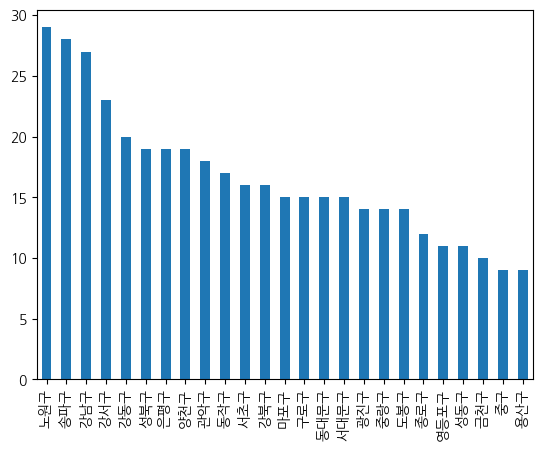

In [ ]:
# 지역, 유형, 주야
df.지역.value_counts().plot.bar()

<Axes: >

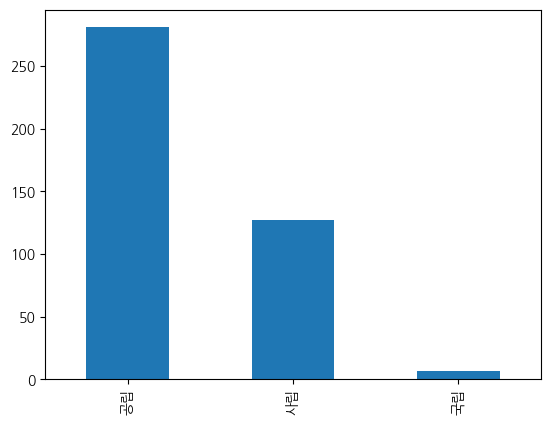

In [ ]:
df['유형'].value_counts().plot.bar()

<Axes: >

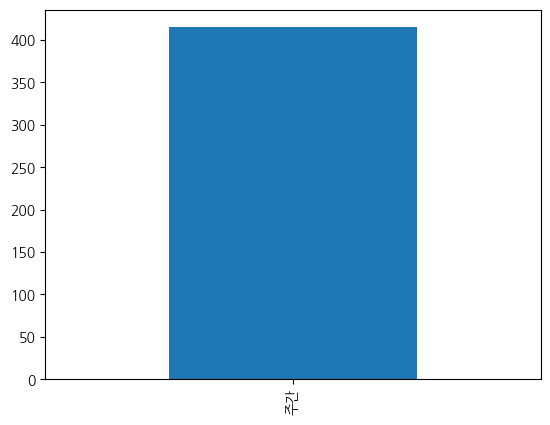

In [ ]:
df['주야'].value_counts().plot.bar()

### 범주형 데이터 인코딩

*   지역 컬럼 -> 25개의 지역구
*   유형 컬럼> 3개의 유형(국립, 공립, 사립)



In [ ]:
# 2) 데이터프레임에 새로운 컬럼으로 추가
df['location'] = l_location
df['type'] = l_type

df.head()

NameError: ignored

In [ ]:
# 범주형(텍스트) -> (숫자형태로 변경) -> 성능에 따라 인코딩으로 발전가능
from sklearn import preprocessing
import numpy as np
# 1) 지역 컬럼 라벨링
label_encoder = preprocessing.LabelEncoder()
l_location = label_encoder.fit_transform(df['지역']) # 0~24
l_type = label_encoder.fit_transform(df['유형']) # 0~2
np.unique(l_type)


array([0, 1, 2])

In [ ]:
# 3) 클러스터링에 필요한 속성만 선택 -> X에 담기
#column_list = [9,10,11,13,20,21]   # 과학고, 자사고, 외고국제고, 체고, 지역(라벨링), 유형(라벨링)
column_list = [9,10,11,13]   # 특성화, 과고, 외고국제고, 체고, 자사고
X = df.iloc[:, column_list] #iloc[rows_index, col_index]
X

,과학고,외고_국제고,예고_체고,자사고
0,0.018,0.007,0.000,0.227
1,0.000,0.035,0.008,0.043
2,0.009,0.012,0.003,0.090
3,0.013,0.013,0.019,0.065
4,0.007,0.010,0.005,0.282
...,...,...,...,...
410,0.000,0.000,0.940,0.000
411,0.000,0.000,0.875,0.000
412,0.000,0.000,0.861,0.000
413,0.000,0.000,0.751,0.000


In [ ]:
# X 정규화
X = preprocessing.StandardScaler().fit(X).transform(X)
X

array([[ 2.02375287, -0.57972902, -0.18926749,  1.84751715],
       [-0.65047921,  1.84782097, -0.10221179, -0.48039958],
       [ 0.68663683, -0.14623795, -0.1566216 ,  0.11423133],
       ...,
       [-0.65047921, -1.18661652,  9.1801025 , -1.0244236 ],
       [-0.65047921, -1.18661652,  7.98308659, -1.0244236 ],
       [-0.65047921,  0.89414062, -0.18926749, -0.89790638]])

## DBSCAN 군집 모델 설정

In [ ]:
from sklearn import cluster
# 한 데이터 포인트에서 eps 거리 안에 데이터가 min_samples 개수만큼 포함되어 있으면 클러스터로 포함
# eps : 핵심 포인트를 중심으로 측정되는 유클리디언 거리값
# min_samples : 핵심 포인트를 중심점으로 간주하는 주변 지역의 표본 수
dbm = cluster.DBSCAN(eps=0.3, min_samples=5)

## 모델 학습하기

In [ ]:
dbm.fit(X)

DBSCAN(eps=0.3)

## 모델 예측(군집) 확인하기

In [ ]:
np.unique(dbm.labels_)

df['Cluster']=dbm.labels_
df['Cluster'].value_counts()

-1    218
 0    159
 1     12
 3     11
 2     10
 4      5
Name: Cluster, dtype: int64

In [ ]:
df.head()

,지역,학교명,코드,유형,주야,남학생수,여학생수,일반고,특성화고,과학고,...,예고_체고,마이스터고,자사고,자공고,기타진학,취업,미상,위도,경도,Cluster
0,성북구,서울대학교사범대학부설중학교,3,국립,주간,277,0,0.585,0.148,0.018,...,0.000,0.011,0.227,0.000,0.004,0,0.000,37.594942,127.038909,-1
1,종로구,서울대학교사범대학부설여자중학교,3,국립,주간,0,256,0.680,0.199,0.000,...,0.008,0.000,0.043,0.004,0.031,0,0.000,37.577473,127.003857,-1
2,강남구,개원중학교,3,공립,주간,170,152,0.817,0.047,0.009,...,0.003,0.006,0.090,0.003,0.009,0,0.003,37.491637,127.071744,-1
3,강남구,개포중학교,3,공립,주간,83,72,0.755,0.097,0.013,...,0.019,0.019,0.065,0.000,0.019,0,0.000,37.480439,127.062201,-1
4,서초구,경원중학교,3,공립,주간,199,212,0.669,0.017,0.007,...,0.005,0.000,0.282,0.000,0.010,0,0.000,37.510750,127.008900,-1


In [ ]:
# 클러스터 그룹별 내용 확인
group_cols = [0,1,3] + column_list

grouped = df.groupby('Cluster')

for index, group in grouped:
  print(' *Cluster: ',index)
  print(' *len: ', len(group))
  print(group.iloc[:,group_cols])
  print('-----------------------------------')
  print('\n')



 *Cluster:  -1
 *len:  218
      지역               학교명  유형    과학고  외고_국제고  예고_체고    자사고
0    성북구    서울대학교사범대학부설중학교  국립  0.018   0.007  0.000  0.227
1    종로구  서울대학교사범대학부설여자중학교  국립  0.000   0.035  0.008  0.043
2    강남구             개원중학교  공립  0.009   0.012  0.003  0.090
3    강남구             개포중학교  공립  0.013   0.013  0.019  0.065
4    서초구             경원중학교  공립  0.007   0.010  0.005  0.282
..   ...               ...  ..    ...     ...    ...    ...
386  종로구             서울맹학교  국립  0.000   0.000  0.077  0.000
410  강남구           국립국악중학교  국립  0.000   0.000  0.940  0.000
411  금천구         국립전통예술중학교  국립  0.000   0.000  0.875  0.000
412  광진구            선화예술학교  사립  0.000   0.000  0.861  0.000
413   중구              예원학교  사립  0.000   0.000  0.751  0.000

[218 rows x 7 columns]
-----------------------------------


 *Cluster:  0
 *len:  159
      지역      학교명  유형  과학고  외고_국제고  예고_체고    자사고
13   서초구  동덕여자중학교  사립  0.0   0.022  0.000  0.038
22   강남구    수서중학교  공립  0.0   0.019  0.000  0.044
28   서초구    언남중학교 

## 클러스터링 결과 지도 시각화

In [ ]:
mschool_map = folium.Map(location=[37.55, 126.98], tiles='Stamen Terrain', zoom_start=12)

colors = {-1: 'gray', 0:'coral', 1:'blue', 2:'green', 3:'red', 4:'purple', 5:'orange'}

# 중학교의 위치정보를 circleMarker로 표시 -> popup 학교명 출력
for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster):
  folium.CircleMarker([lat,lng],  #위도,경도
                      radius=5,   # 반지름
                      color=colors[clus], # 둘레색상
                      fill=True,
                      fill_color= colors[clus], # 원안에 색상
                      fill_opactiy=0.7, # 투명도
                      popup='<pre>'+name+'</pre>').add_to(mschool_map)

mschool_map

